In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
from sklearn import tree
import seaborn as sns

In [2]:
# Asegurarse de que las gráficas se carguen en el notebook
%matplotlib inline

In [3]:
# Cargar el dataset
data = pd.read_csv('new_data_evaluacion.csv')

In [4]:
# Verificar los nombres de las columnas
print(data.columns)

Index(['Unnamed: 0', 'edad', 'fnlwgt', 'educacionNum', 'estadoCivil',
       'relacion', 'ocupacion', 'raza', 'genero', 'gananciaCapital',
       'perdidaCapital', 'horasSemana', 'pais', 'tipoEmpleo', 'salario'],
      dtype='object')


In [5]:
# La columna de ingresos es 'salario'
X = data.drop('salario', axis=1)
y = data['salario']

In [6]:
# Dividir el dataset en conjunto de entrenamiento y de prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [7]:
# Crear el modelo de árbol de decisión
clf = DecisionTreeClassifier(random_state=42)

In [8]:
# Entrenar el modelo
clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [9]:
# Predecir con el conjunto de prueba
y_pred = clf.predict(X_test)

In [10]:
# Evaluar el modelo
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print("Accuracy:", accuracy)
print("Classification Report:\n", report)
print("Confusion Matrix:\n", conf_matrix)

Accuracy: 0.782228895106804
Classification Report:
               precision    recall  f1-score   support

           0       0.55      0.56      0.55      3544
           1       0.86      0.85      0.86     11109

    accuracy                           0.78     14653
   macro avg       0.70      0.71      0.70     14653
weighted avg       0.78      0.78      0.78     14653

Confusion Matrix:
 [[1973 1571]
 [1620 9489]]


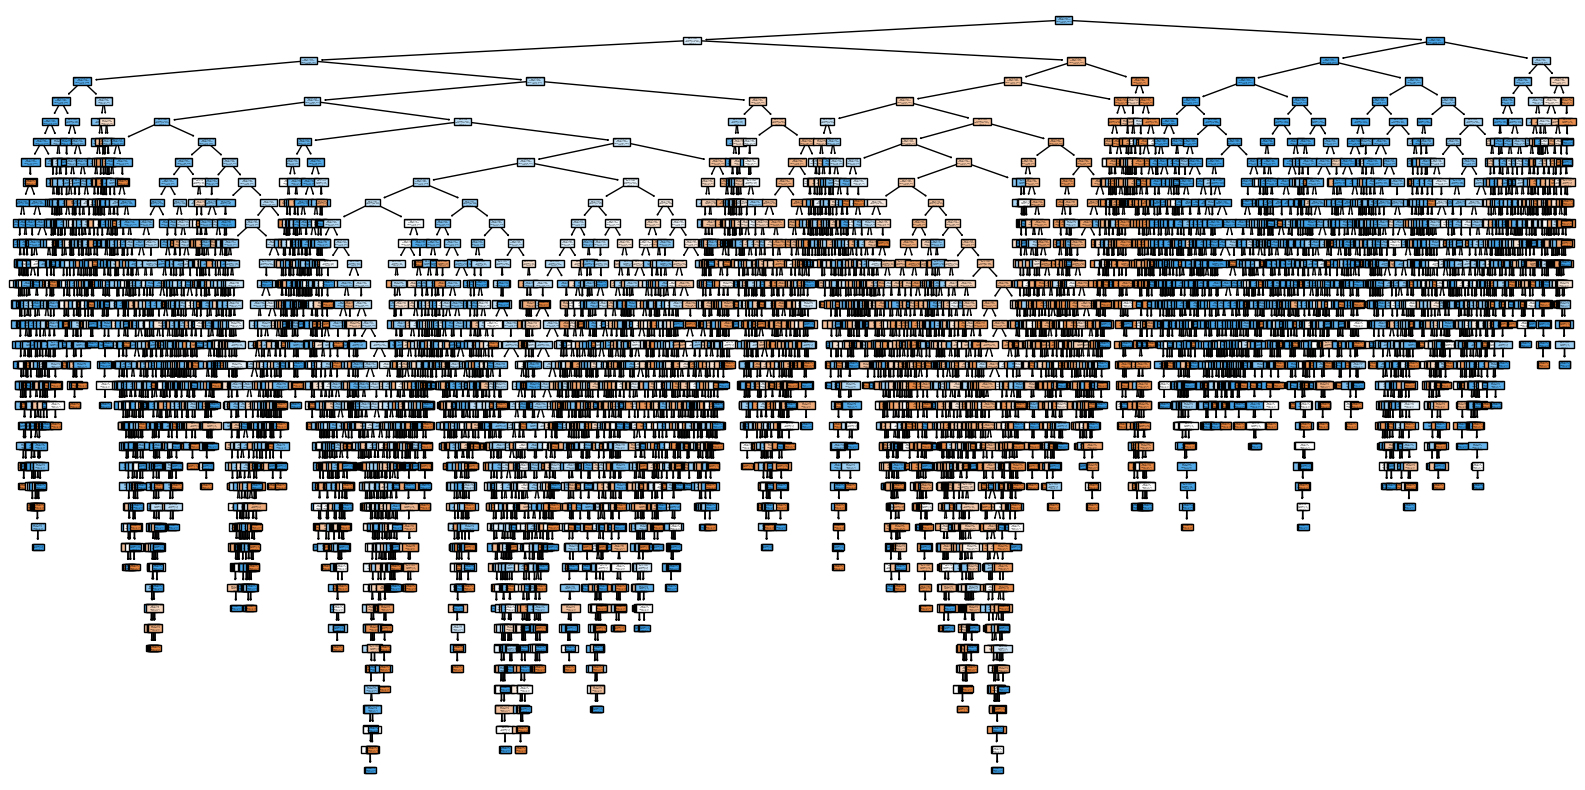

In [11]:
# Visualización del árbol de decisión
plt.figure(figsize=(20,10))
tree.plot_tree(clf, filled=True, feature_names=X.columns, class_names=[str(cls) for cls in clf.classes_])
plt.show()

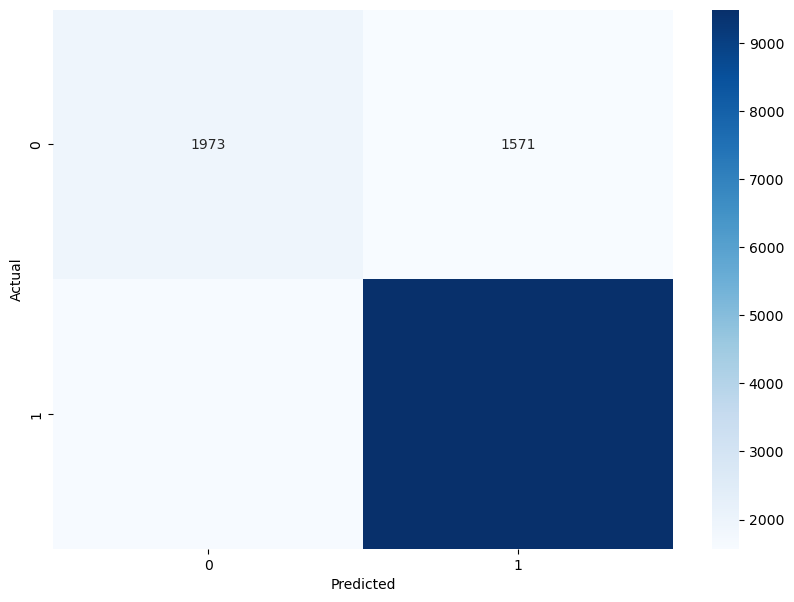

In [12]:
# Visualización de la matriz de confusión
plt.figure(figsize=(10,7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=clf.classes_, yticklabels=clf.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()